In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Foundations of the model

The components of the closed economy AS-AD model are:

- IS: $\tilde Y_t = \bar a - \bar b(R_t - \bar r)$
- MPR: $R_t - \bar r = \psi (\pi_t - \bar \pi) + \phi \tilde Y_t$
- PC: $\pi_t = \pi_{t-1} + \bar \nu \tilde Y_t + \bar o_t$


The IS curve is derived from the national income identity $Y_t = C_t + I_t + G_t + NX_t$. If we assume that each component's share of potential output is a constant, except for investment which is also determined by deviations in the real interest rate $R_t$ from the marginal product of capital $\bar r$, we get:
- $\frac{C_t}{\bar Y_t} = \bar a_c$
- $\frac{I_t}{\bar Y_t} = \bar a_i + \bar b_i (R_t - \bar r)$
- $\frac{G_t}{\bar Y_t} = \bar a_g$
- $\frac{NX_t}{\bar Y_t} = \bar a_{nx}$

Given that $\tilde Y_t \equiv \frac {Y_t}{\bar Y_t} -1$, we can write the IS curve as $\tilde Y_t = \bar a - \bar b(R_t - \bar r)$, where $\bar a:= \bar a_c + \bar a_i + \bar a_g + \bar a_{nx} - 1$ and $\bar b:= \bar b_i$.  

With PC as AS, and substituting MPR into IS for AD:
- AS: $\pi_t = \pi_{t-1} + \bar \nu \tilde Y_t + \bar o_t$
- AD: $\tilde Y_t = \frac{\bar a}{1+\phi \bar b } - \frac{\psi \bar b }{1+ \phi \bar b } (\pi_t - \bar \pi)$


We can solve for the two unknowns of $\tilde Y_t$ and $\pi_t$ as recurrence relation, by using the two AS/AD equations. The details are below, but we arrive at:

$$\tilde Y_t = \frac{\bar a}{1+\phi \bar b + \bar \nu \psi \bar b} - \psi \frac{\bar b}{1+\phi \bar b + \bar \nu \psi \bar b}(\pi_{t-1} - \bar \pi + \bar o_t)$$

$$\pi_t = \bar \pi + \frac{\bar \nu \bar a}{1 + \phi \bar b + \bar \nu \psi \bar b} + \frac{1 + \phi \bar b}{1+\phi \bar b + \bar \nu \psi \bar b}(\pi_{t-1} - \bar \pi + \bar o_t)$$

## Derivation of analytic solution

### Finding the inflation gap

First substitute the AD equation into the AS equation, letting $\hat a:= \frac{\bar a}{1+ \phi \bar b}$ and $\hat b:= \frac{\bar b}{1+\phi \bar b }$:

$$\pi_t = \pi_{t-1} + \bar \nu \psi \left( \hat a - \hat b (\pi_t - \bar \pi) \right) + \bar o_t$$



Adding $\bar \nu \psi \hat b (\pi_t - \bar \pi) - \bar \pi$ to both sides and factorising the left-hand side:

$$(1 + \bar \nu \psi \hat b)(\pi_t - \bar \pi) = \pi_{t-1}  + \bar \nu \hat a + \bar o_t - \bar \pi$$ 



Dividing through by $(1 + \bar \nu \psi \hat b)$:

$$\pi_t - \bar \pi  = \frac{\bar \nu \hat a}{1 + \bar \nu \psi \hat b} + \frac{\pi_{t-1} -\bar \pi + \bar o_t }{1 + \bar \nu \psi \hat b} $$


This can be tidied up by letting $\check a:= \frac{\hat a}{1+\bar \nu \psi \hat b} = \frac{\bar a}{1 + \phi \bar b  + \bar \nu \psi \bar b}$ and $\check b:= \frac{\hat b}{1+ \bar \nu \psi \hat b} = \frac{\bar b}{1+\phi \bar b + \bar \nu \psi \bar b}$.

Note that since $1-\bar \nu \psi \check b = 1-\frac{\bar \nu \psi \hat b }{1+ \bar \nu \psi \hat b} = \frac{1+ \bar \nu \psi \hat b - \bar \nu \psi \hat b }{1+ \bar \nu \psi \hat b} = \frac{1}{1+ \bar \nu \psi \hat b}$, we can put the denominator of the second term in the form $(1-\bar \nu \psi \check b)$:


#### Solution for the inflation gap (with redefined $a$ and $b$)

$$\pi_t - \bar \pi = \bar \nu \check a + (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t)$$

We can use the fact that $\check a = \frac{\bar a}{1 + \phi \bar b  + \bar \nu \psi \bar b}$ and $\check b = \frac{\bar b}{1+\phi \bar b + \bar \nu \psi \bar b}$ to put it in terms of the original parameters.

#### Solution for the inflation gap (with original $a$ and $b$)


$$\pi_t - \bar \pi = \frac{\bar \nu \bar a}{1 + \phi \bar b + \bar \nu \psi \bar b} + \frac{1 + \phi \bar b}{1+\phi \bar b + \bar \nu \psi \bar b}(\pi_{t-1} - \bar \pi + \bar o_t)$$


### Finding the output gap


Substituting the neater version of AS (with $\check a$ and $\check b$) into our AD equation (we'll again temporarily use $\hat a$ and $\hat b$  and return to our original parameters $\bar a$ and $\bar b$ at the end):
$$\tilde Y_t = \hat a - \psi  \hat b (\bar \nu \check a + (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t))$$


Multiplying out the brackets and substituting $\hat a$ for $(1+ \bar \nu \psi \hat b)\check a$:

$$\tilde Y_t = (1+ \bar \nu \psi \hat b)\check a -  \psi \hat b \bar \nu \check a - \psi \hat b (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t))$$

$$= \check a - \psi \hat b (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t))$$

Remember that $(1-\bar \nu \psi \check b) = \frac{1}{1+ \bar \nu \psi \hat b}$, so substituting this back in, we get:

$$\tilde Y_t = \check a - \frac{\psi \hat b}{1+ \bar \nu \psi \hat b}(\pi_{t-1} - \bar \pi + \bar o_t)$$

But we defined $\check b:= \frac{\hat b}{1+ \bar \nu \psi \hat b}$, so the fraction can be tidied up to:

#### Solution for the output gap (with redefined $a$ and $b$)


$$\tilde Y_t = \check a - \psi \check b(\pi_{t-1} - \bar \pi + \bar o_t)$$

In terms of the original parameters, the output gap is:

#### Solution for the output gap (with original $a$ and $b$)


$$\tilde Y_t = \frac{\bar a}{1+\phi \bar b + \bar \nu \psi \bar b} - \psi \frac{\bar b}{1+\phi \bar b + \bar \nu \psi \bar b}(\pi_{t-1} - \bar \pi + \bar o_t)$$

### Rolling back the recurrence relation

_(Note that at the moment we've said that $\bar a$ does not vary with time when in fact it does for demand shocks in much the same way as $\bar o_t$ does for supply ones. This is a simplification that we'll need to address later.)_

We found above that
$$\pi_t = \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{green}\pi_{t-1}} - \bar \pi + \bar o_t)$$


Rolling back one period, we get:
$${\color{green}\pi_{t-1}} = {\color{green}\bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{blue}\pi_{t-2}} - \bar \pi + \bar o_{t-1})}$$

And one further period:
$${\color{blue}\pi_{t-2}} = {\color{blue} \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{purple}\pi_{t-3}} - \bar \pi + \bar o_{t-2})}$$

First substituting ${\color{green}\pi_{t-1}}$ into the equation for $\pi_t$ we get:

$$\pi_t = \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{green} \underline{\bar \pi} + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{blue} \pi_{t-2}} - \bar \pi + \bar o_{t-1})} - \underline{\bar \pi} + \bar o_t)$$

Cancelling out the two $\underline{ \bar \pi}$  terms and substituting in ${\color{blue}\pi_{t-2}}$, we get:

$$\pi_t = \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{green} \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{blue} \underline{\bar \pi} + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{purple}\pi_{t-3}} - \bar \pi + \bar o_{t-2})} -\underline{\bar \pi} + \bar o_{t-1})} + \bar o_t)$$

We can again cancel out the two $\underline{ \bar \pi}$ terms:

$$\pi_t = \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{green} \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{blue} \bar \nu \check a + (1-\bar \nu  \psi \check b)({\color{purple}\pi_{t-3}} - \bar \pi + \bar o_{t-2})}  + \bar o_{t-1})} + \bar o_t)$$

Multiplying out leads to:

$$\pi_t = \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b) \bar \nu \check a + (1-\bar \nu  \psi \check b)^2 \bar \nu \check a + (1-\bar \nu  \psi \check b)^3 ({\color{purple}\pi_{t-3}} - \bar \pi + \bar o_{t-2}) + (1-\bar \nu  \psi \check b)^2 \bar o_{t-1} + (1-\bar \nu  \psi \check b) \bar o_t$$

Which we can rearrange to:

$$\pi_t = \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)(\bar \nu \check a + \bar o_t) + (1-\bar \nu  \psi \check b)^2(\bar \nu \check a + \bar o_{t-1}) + (1-\bar \nu  \psi \check b)^3 \boldsymbol{({\color{purple}\pi_{t-3}} - \bar \pi + \bar o_{t-2})}  $$

But note that if we were to find the equation for $\pi_{t-3}$ and substitute that in, we'd be able to replace $(1-\bar \nu  \psi \check b)^3 \boldsymbol{({\color{purple}\pi_{t-3}} - \bar \pi + \bar o_{t-2})}$ with $ (1-\bar \nu  \psi \check b)^3(\bar \nu \check a + \bar o_{t-2}) + (1-\bar \nu  \psi \check b)^4 \boldsymbol{({\color{orange}\pi_{t-4}} - \bar \pi + \bar o_{t-3})}$, and so on.

So, for instance, we could explicitly calculate:

$$\pi_4 = \bar \pi + \bar \nu \check a + (1-\bar \nu  \psi \check b)(\bar \nu \check a + \bar o_4) + (1-\bar \nu  \psi \check b)^2(\bar \nu \check a + \bar o_3) + (1-\bar \nu  \psi \check b)^3(\bar \nu \check a + \bar o_2) + (1-\bar \nu  \psi \check b)^4 ({\color{orange}\pi_{t-4}} - \bar \pi + \bar o_1)$$

where $\pi_0=\bar \pi$ (and $\bar o_0=0$), so the last term simplifies to $(1-\bar \nu  \psi \check b)^4 \bar o_1$.

Generalising this, we can get a summation for $\pi_t$:

$$\pi_t = \bar \pi + \bar \nu \check a(1- (1-\bar \nu \psi \check b)^t) + \sum_{i=1}^{t} (1-\bar \nu  \psi \check b)^i(\bar \nu \check a + \bar o_{t-i+1})$$

There's a bit of messiness because for the case where $i=t$, we don't want to be including $\bar \nu + \check a$ in what we multiply $(1-\bar \nu \psi \check b)^t$ with. So we subtract that off separately, factorising with the $\bar \nu + \check a$ term that's found at the start.

#### Next steps

We also probably want to take into account the fact that $\bar a$ and $\bar o_t$ varies with time. And we'd need to do a similar exercise to find what $\tilde Y_t$ is as a sum.

## A continuous approach

The IS and MP curves are unchanged in a continuous model. We just need to reformulate the PC from its discrete version $\pi_t = \pi_{t-1} + \bar \nu \tilde Y_t + \bar o_t$ to a continuous one, where we replace $(\pi_t - \pi_{t-1})$ with $\frac{d\pi}{dt}$.

So this yields:
$$\text{AS: } \frac{d\pi}{dt} = \bar \nu \tilde Y(t) + \bar o(t)$$
$$\text{AD: } \tilde Y(t) = \hat a(t) - \psi \hat b\cdot [\pi(t) - \bar \pi]$$
Where we want to solve for $\pi(t)$ and $\tilde Y(t)$ over time, given initial steady-state conditions $\pi_0 = \bar \pi$, $\tilde Y_0 = 0$, $\hat b \in \mathbb R$; policy parameters $\phi$, $\psi$, $\bar \pi$; and exogenous shocks $\bar o(t)$, $\hat a(t)$.

## Setup

In [3]:
# Parameters
A_BAR = 0  # Demand shocks
B_BAR = 0.5  # Sensitivity of investment & consumption to real interest rate deviations
R_BAR = 2  # MP_K; Long-run real interest rate (%)
PI_BAR = 2  # Inflation target (%)
PSI = 0.5  # Inflation deviation sensitivity
PHI = 0.5  # Output gap sensitivity
NU_BAR = 0.5  # Sensitivity of inflation expectations to output gap
O_BAR = 0.0  # Supply shocks

## Plotting AS/AD and changing parameters

In [4]:
# Generate values for plotting
Y_tilde_values = np.linspace(-10, 10, 400)
pi_values = np.linspace(-10, 10, 400)

In [5]:
def AS_curve(Y_tilde_t, pi_bar, nu_bar, o_bar, steady_state=True):
    if not steady_state:
        raise NotImplementedError
    return pi_bar + nu_bar * Y_tilde_t + o_bar

def AD_curve(pi_t, pi_bar, a_bar, b_bar, psi, phi, steady_state=True):
    if not steady_state:
        raise NotImplementedError
    return a_bar / (1 + b_bar * phi) - b_bar * psi / (1 + b_bar * phi) * (pi_t - pi_bar)

In [6]:
def plot_curves(a_bar, b_bar, pi_bar, nu_bar, o_bar, psi, phi):
    # Calculate corresponding values for AS curve and AD curve
    AS_values = AS_curve(Y_tilde_values, pi_bar, nu_bar, o_bar)
    AD_values = AD_curve(pi_values, pi_bar, a_bar, b_bar, psi, phi)

    # Plot the AS curve and AD curve
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(Y_tilde_values, AS_values, label=r'AS: $\pi_t = \pi_{t-1} + \bar \nu \tilde Y_t + \bar o_t$', color='blue')
    ax.plot(AD_values, pi_values, label=r'AD: $\tilde Y_t = \frac{\bar a}{1+\bar b \phi} - \frac{\bar b \psi}{1+\bar b \phi} (\pi_t - \bar \pi)$', color='red')
    ax.set_xlabel('Output Gap, $\\tilde{Y}$')
    ax.set_ylabel('Inflation Rate, $\\pi$')
    ax.set_title('AS-AD Model')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.axhline(pi_bar, color='green', linestyle='--', label='$\\bar \\pi = 2\\%$')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.legend(loc='lower left')
    plt.show()


In [7]:
# Create sliders for parameters
a_bar_slider = widgets.FloatSlider(value=A_BAR, min=-10, max=10, step=0.1, description=r'$a_{bar}$:')
b_bar_slider = widgets.FloatSlider(value=B_BAR, min=0.1, max=1, step=0.01, description=r'$b_{bar}$:')
pi_bar_slider = widgets.FloatSlider(value=PI_BAR, min=-5, max=5, step=0.1, description=r'$\pi_{bar}$:')
nu_bar_slider = widgets.FloatSlider(value=NU_BAR, min=0, max=1, step=0.01, description=r'$\nu_{bar}$:')
o_bar_slider = widgets.FloatSlider(value=O_BAR, min=-10, max=10, step=0.1, description=r'$o_{bar}$:')
psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')

In [8]:
# Create interactive widget
widgets.interact(plot_curves, a_bar=a_bar_slider, b_bar=b_bar_slider, pi_bar=pi_bar_slider,
                 nu_bar=nu_bar_slider, o_bar=o_bar_slider, psi=psi_slider, phi=phi_slider)
# note that the LaTeX isn't rendering properly; see https://stackoverflow.com/questions/77360575/how-to-get-latex-symbol-rendering-correctly-in-ipywidgets 

interactive(children=(FloatSlider(value=0.0, description='$a_{bar}$:', max=10.0, min=-10.0), FloatSlider(value…

<function __main__.plot_curves(a_bar, b_bar, pi_bar, nu_bar, o_bar, psi, phi)>

## Dynamic model

For now, we'll explicitly solve the model for $\pi_t$ and $\tilde Y_t$ using the analytic equations found above. A next step would be to use numerical methods to solve the model.

In [9]:
def pi_t(pi_t_minus_1, pi_bar, a_bar, b_bar, psi, phi, nu_bar, o_bar_t):
    return pi_bar + nu_bar * a_bar / (1 + phi * b_bar + nu_bar * psi * b_bar) + (1 + phi * b_bar) / (1 + phi * b_bar + nu_bar * psi * b_bar) * (pi_t_minus_1 - pi_bar + o_bar_t)

def Y_tilde_t(pi_t_minus_1, pi_bar, a_bar, b_bar, psi, phi, nu_bar, o_bar_t):
    return a_bar / (1 + b_bar * phi + nu_bar * psi * b_bar) - psi * b_bar / (1 + phi * b_bar + nu_bar * psi * b_bar) * (pi_t_minus_1 - pi_bar + o_bar_t)

First, just check that the model is stable in its steady state.

In [10]:
# Time parameters
T = 100
time = np.arange(0, T)

# Arrays to store results
Y_tildes = np.zeros_like(time)
pis = np.zeros_like(time)

# Initial conditions
Y_tilde_0 = 0
pi_0 = PI_BAR

Y_tildes[0] = Y_tilde_0
pis[0] = pi_0

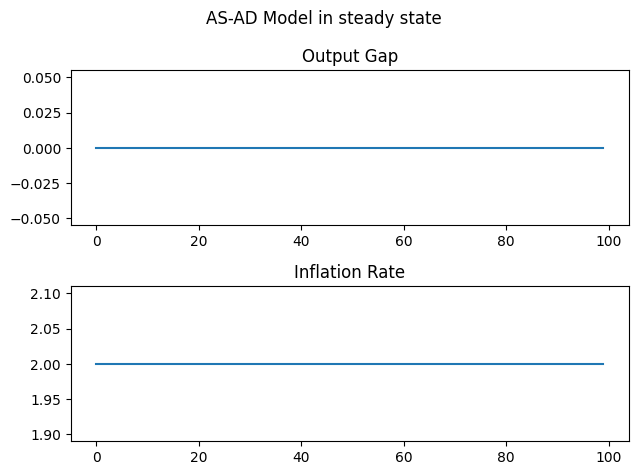

In [11]:
for t in range(1, T):
    Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, O_BAR)
    pis[t] = pi_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, O_BAR)
fig, axs = plt.subplots(2, 1)
axs[0].plot(time, Y_tildes, label='Output Gap, $\\tilde{Y}$')
axs[0].set_title('Output Gap')
axs[1].plot(time, pis, label='Inflation Rate, $\\pi$')
axs[1].set_title('Inflation Rate')
fig.suptitle('AS-AD Model in steady state')
plt.tight_layout()

### Experiments



#### Supply shock

In [12]:
# Time parameters
T = 100
time = np.arange(0, T)

# Arrays to store results
Y_tildes = np.zeros_like(time, dtype=float)
pis = np.zeros_like(time, dtype=float)

# Initial conditions
Y_tilde_0 = 0
pi_0 = PI_BAR

Y_tildes[0] = Y_tilde_0
pis[0] = pi_0

# Setting up a negative supply shock in period 5
o_bars = np.zeros_like(time, dtype=float)
o_bars[10] = 1

In [13]:
for t in range(1, T):
    Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, o_bars[t])
    pis[t] = pi_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, o_bars[t])

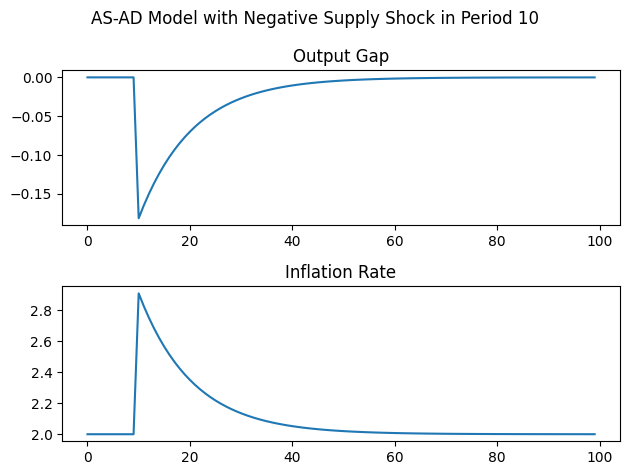

In [14]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(time, Y_tildes, label='Output Gap, $\\tilde{Y}$')
axs[0].set_title('Output Gap')
axs[1].plot(time, pis, label='Inflation Rate, $\\pi$')
axs[1].set_title('Inflation Rate')
fig.suptitle('AS-AD Model with Negative Supply Shock in Period 10')
plt.tight_layout()

What is the effect of the policy parameters $\phi$ and $\psi$ on the response of the economy to a supply shock?

In [15]:
def simulate_supply_shock(psi, phi, T=100):
    # Time parameters
    time = np.arange(0, T)

    # Arrays to store results
    Y_tildes = np.zeros_like(time, dtype=float)
    pis = np.zeros_like(time, dtype=float)

    # Initial conditions
    Y_tilde_0 = 0
    pi_0 = PI_BAR

    Y_tildes[0] = Y_tilde_0
    pis[0] = pi_0

    # Setting up a negative supply shock in period 5
    o_bars = np.zeros_like(time, dtype=float)
    o_bars[10] = 1

    for t in range(1, T):
        Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, psi, phi, NU_BAR, o_bars[t])
        pis[t] = pi_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, psi, phi, NU_BAR, o_bars[t])
    return Y_tildes, pis

In [16]:
# Define the range of psi and phi parameters
psi_values = np.logspace(0, 2, num=4)
phi_values = np.logspace(0, 2, num=4)

# Initialize lists to store results
output_gaps = []
inflations = []

# NOTE I think it would be better to store the results as (Y_tilde, pi) tuples in a 3D array (phi x psi x T) from the start, rather than reshaping later on

In [17]:
# Run grid search
for psi in (psi_values):
    for phi in phi_values:
        # Run the simulation with the current psi and phi
        output_gap, inflation = simulate_supply_shock(psi, phi, T)
        output_gaps.append(output_gap)
        inflations.append(inflation)

In [18]:
# Reshape results to match the grid layout
output_gaps = np.array(output_gaps).reshape(len(psi_values), len(phi_values), T)
inflations = np.array(inflations).reshape(len(psi_values), len(phi_values), T)

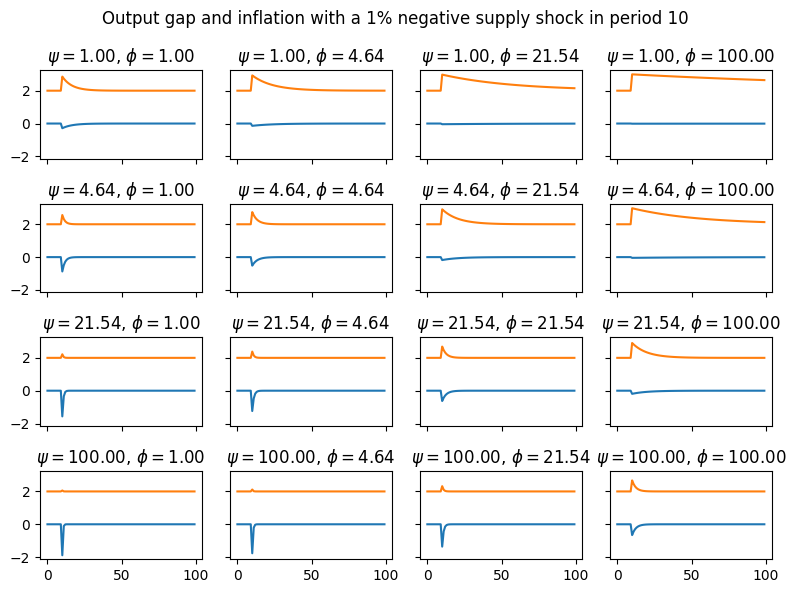

In [19]:
# Plot the time series of output gap and inflation
fig, axs = plt.subplots(len(psi_values), len(phi_values), sharex=True, sharey=True, figsize=(8, 6))
for i, psi in enumerate(psi_values):
    for j, phi in enumerate(phi_values):
        axs[i, j].plot(output_gaps[i, j], label='Output gap')
        axs[i, j].plot(inflations[i, j], label='Inflation')
        axs[i, j].set_title(f'$\\psi = {psi:.2f}$, $\\phi = {phi:.2f}$')
fig.suptitle('Output gap and inflation with a 1% negative supply shock in period 10')
fig.tight_layout()
plt.show()
# TODO put a legend on the plot

In [20]:
def plot_supply_shock(psi, phi):
    output_gap, inflation = simulate_supply_shock(psi, phi, T=100)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(output_gap, label='Output gap')
    ax.plot(inflation, label='Inflation')
    ax.legend()
    ax.set(title = 'Output gap and inflation with a 1% negative supply shock in period 10',
              xlabel = 'Time',
              ylabel = 'Level')
    plt.show()

In [21]:
# Create sliders for parameters
psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')

widgets.interact(plot_supply_shock, psi=psi_slider, phi=phi_slider)
# TODO work out why this is displaying three times...

interactive(children=(FloatSlider(value=0.5, description='$\\psi$:'), FloatSlider(value=0.5, description='$\\p…

<function __main__.plot_supply_shock(psi, phi)>

#### Demand shock

In [22]:
def simulate_demand_shock(psi, phi, T=100):
    # Time values
    time = np.arange(0, T)

    # Arrays to store results
    Y_tildes = np.zeros_like(time, dtype=float)
    pis = np.zeros_like(time, dtype=float)

    # Initial conditions
    Y_tilde_0 = 0
    pi_0 = PI_BAR

    Y_tildes[0] = Y_tilde_0
    pis[0] = pi_0

    # Setting up a positive demand shock in period 5
    a_bars = np.zeros_like(time, dtype=float)
    a_bars[10] = 1

    for t in range(1, T):
        Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, a_bars[t], B_BAR, psi, phi, NU_BAR, O_BAR)
        pis[t] = pi_t(pis[t - 1], PI_BAR, a_bars[t], B_BAR, psi, phi, NU_BAR, O_BAR)
    return Y_tildes, pis

In [23]:
def plot_demand_shock(psi, phi):
    output_gap, inflation = simulate_demand_shock(psi, phi, T=100)
    fig, ax = plt.subplots()
    ax.plot(output_gap, label='Output gap')
    ax.plot(inflation, label='Inflation')
    ax.legend()
    ax.set(title = 'Output gap and inflation with a 1% positive demand shock in period 10',
              xlabel = 'Time',
              ylabel = 'Level')
    plt.show()

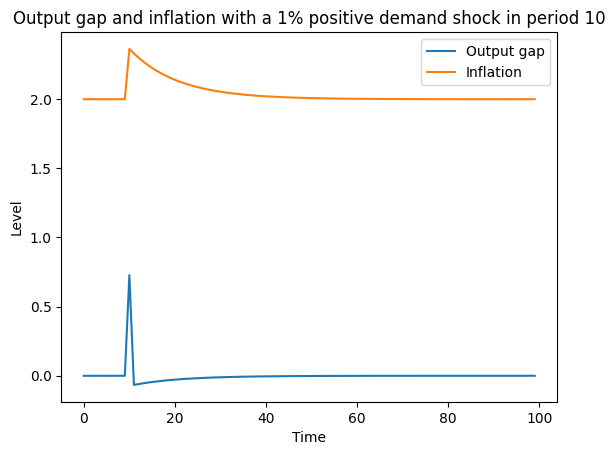

In [24]:
plot_demand_shock(PSI, PHI)

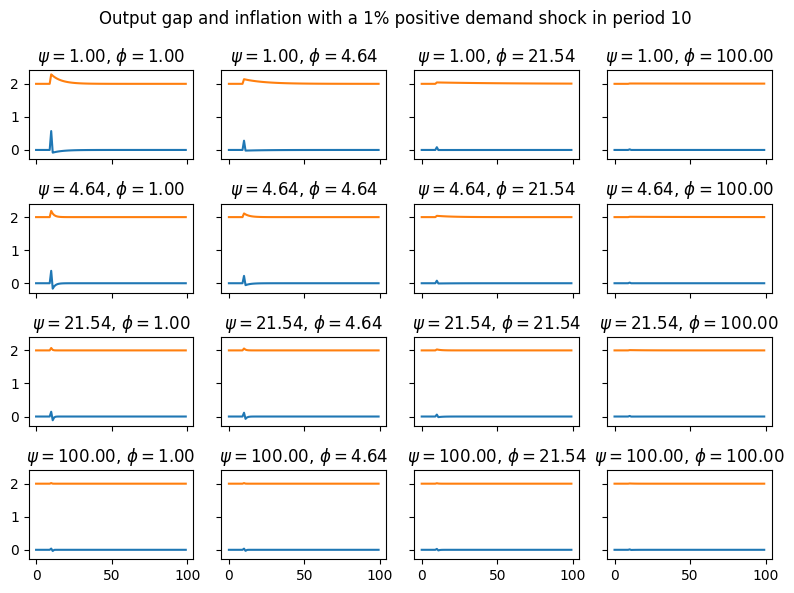

In [25]:
# Define the range of psi and phi parameters
psi_values = np.logspace(0, 2, num=4)
phi_values = np.logspace(0, 2, num=4)

# Initialize lists to store results
output_gaps = []
inflations = []

# NOTE I think it would be better to store the results as (Y_tilde, pi) tuples in a 3D array (phi x psi x T) from the start, rather than reshaping later on

# Run grid search
for psi in (psi_values):
    for phi in phi_values:
        # Run the simulation with the current psi and phi
        output_gap, inflation = simulate_demand_shock(psi, phi, T)
        output_gaps.append(output_gap)
        inflations.append(inflation)
# Reshape results to match the grid layout
output_gaps = np.array(output_gaps).reshape(len(psi_values), len(phi_values), T)
inflations = np.array(inflations).reshape(len(psi_values), len(phi_values), T)
# Plot the time series of output gap and inflation
fig, axs = plt.subplots(len(psi_values), len(phi_values), sharex=True, sharey=True, figsize=(8, 6))
for i, psi in enumerate(psi_values):
    for j, phi in enumerate(phi_values):
        axs[i, j].plot(output_gaps[i, j], label='Output gap')
        axs[i, j].plot(inflations[i, j], label='Inflation')
        axs[i, j].set_title(f'$\\psi = {psi:.2f}$, $\\phi = {phi:.2f}$')
fig.suptitle('Output gap and inflation with a 1% positive demand shock in period 10')
fig.tight_layout()
plt.show()
# TODO put a legend on the plot

In [26]:
# Create sliders for parameters
psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')

widgets.interact(plot_demand_shock, psi=psi_slider, phi=phi_slider)

interactive(children=(FloatSlider(value=0.5, description='$\\psi$:'), FloatSlider(value=0.5, description='$\\p…

<function __main__.plot_demand_shock(psi, phi)>

#### Generalised shock

In [27]:
def run_simulation(a_bar=None, b_bar=None, pi_bar=None, nu_bar=None, o_bar=None, psi=None, phi=None, T=100):
    """
    If provided, a_bar, b_bar, pi_bar, nu_bar, o_bar, psi, and phi should be 1D arrays of length T. The policy parameters pi_bar, phi, and psi are also allowed to be scalars.
    """
    a_bar = np.full(T, A_BAR) if a_bar is None else a_bar
    b_bar = np.full(T, B_BAR) if b_bar is None else b_bar
    nu_bar = np.full(T, NU_BAR) if nu_bar is None else nu_bar
    o_bar = np.full(T, O_BAR) if o_bar is None else o_bar

    if np.isscalar(psi):
        psi = np.full(T, psi)
    elif psi is None:
        psi = np.full(T, PSI)

    if np.isscalar(phi):
        phi = np.full(T, phi)
    elif phi is None:
        phi = np.full(T, PHI)

    if np.isscalar(pi_bar):
        pi_bar = np.full(T, pi_bar)
    elif pi_bar is None:
        pi_bar = np.full(T, PI_BAR)

    # Time values
    time = np.arange(0, T)

    # Arrays to store results
    Y_tildes = np.zeros_like(time, dtype=float)
    pis = np.zeros_like(time, dtype=float)
    
    # Initial conditions
    Y_tilde_0 = 0
    pi_0 = PI_BAR
    Y_tildes[0] = Y_tilde_0
    pis[0] = pi_0

    for t in range(1, T):
        Y_tildes[t] = Y_tilde_t(pis[t - 1], pi_bar[t], a_bar[t], b_bar[t], psi[t], phi[t], nu_bar[t], o_bar[t])
        pis[t] = pi_t(pis[t - 1], pi_bar[t], a_bar[t], b_bar[t], psi[t], phi[t], nu_bar[t], o_bar[t])
    return Y_tildes, pis


In [37]:
def plot_simulation(a_bar=None, b_bar=None, pi_bar=None, nu_bar=None, o_bar=None, psi=None, phi=None, T=100):
    Y_tildes, pis = run_simulation(a_bar, b_bar, pi_bar, nu_bar, o_bar, psi, phi, T)
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(Y_tildes, label='Output Gap, $\\tilde{Y}$')
    axs[0].set_title('Output Gap')
    axs[1].plot(pis, label='Inflation Rate, $\\pi$')
    axs[1].set_title('Inflation Rate')
    fig.suptitle('AS-AD Model')
    plt.tight_layout()
    plt.show()

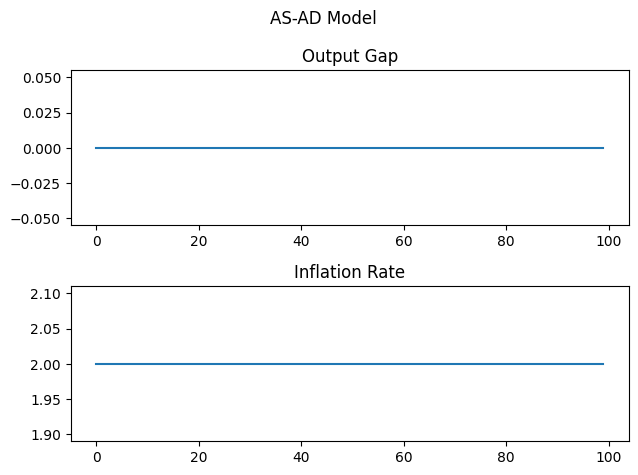

In [29]:
plot_simulation(psi=0.5)

In [30]:
def period_10_shock(shock, T=100):
    vals = np.zeros(T, dtype=float)
    vals[10] = shock
    return vals

In [38]:
# NOTE this doesn't work, if you're doing an interact all the arguments need to be sliders
# or maybe can set them as fixed? https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#fixing-arguments-using-fixed 

# Create sliders for parameters
# a_bar_slider = widgets.FloatSlider(value=A_BAR, min=-10, max=10, step=0.1, description=r'$a_{bar}$:')
# b_bar_slider = widgets.FloatSlider(value=B_BAR, min=0.1, max=1, step=0.01, description=r'$b_{bar}$:')
# pi_bar_slider = widgets.FloatSlider(value=PI_BAR, min=-5, max=5, step=0.1, description=r'$\pi_{bar}$:')
# nu_bar_slider = widgets.FloatSlider(value=NU_BAR, min=0, max=1, step=0.01, description=r'$\nu_{bar}$:')
# o_bar_slider = widgets.FloatSlider(value=O_BAR, min=-10, max=10, step=0.1, description=r'$o_{bar}$:')
# psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
# phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')
# T_slider = widgets.IntSlider(value=100, min=10, max=1000, step=10, description=r'T')

# widgets.interact(plot_simulation, a_bar=a_bar_slider, b_bar=b_bar_slider, pi_bar=pi_bar_slider,
#                  nu_bar=nu_bar_slider, o_bar=o_bar_slider, psi=psi_slider, phi=phi_slider, T=T_slider)

interactive(children=(FloatSlider(value=0.5, description='$\\psi$:'), FloatSlider(value=0.5, description='$\\p…

<function __main__.plot_simulation(psi=None, phi=None, T=100)>

## Dark mode options (a bit untidy)

In [ ]:
from IPython.display import display, HTML

In [ ]:
# Enable dark mode for ipywidgets
dark_mode_css = """
<style>
.widget-label, .widget-button, .widget-toggle-button, .widget-tab, .widget-text, .widget-dropdown, .widget-select > select, .widget-slider > .widget-label > .widget-readout, .widget-textarea, .widget-colorpicker, .widget-numeric input, .widget-upload > .widget-button, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control input {
    background-color: #333;
}
.widget-container {
    background-color: #222;
}
</style>
"""
display(HTML(dark_mode_css))

plt.style.use('dark_background')

In [ ]:
# Reset ipywidgets to default styles
reset_css = """
<style>
/* Reset background-color for ipywidgets */
.widget-label, .widget-button, .widget-toggle-button, .widget-tab, .widget-text, .widget-dropdown, .widget-select > select, .widget-slider > .widget-label > .widget-readout, .widget-textarea, .widget-colorpicker, .widget-numeric input, .widget-upload > .widget-button, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control input {
    background-color: inherit;
}
/* Reset background-color for widget containers */
.widget-container {
    background-color: inherit;
}
</style>
"""
display(HTML(reset_css))